In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das duas planilhas
data1 = pd.read_csv('c:\\archive\\CADASTRO_CURSOS_2020.CSV', encoding='latin1', sep=';')
data2 = pd.read_csv('c:\\archive\\CADASTRO_IES_2020.CSV', encoding='latin1', sep=';')

# Concatenar as planilhas
data = pd.concat([data1, data2], axis=0)

# Verificar informações dos dados concatenados
print(data.info())

# Exibir as 5 primeiras linhas
print(data.head())

C:\Users\Julia\AppData\Local\Temp\ipykernel_7736\26481648.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('c:\\archive\\CADASTRO_CURSOS_2020.CSV', encoding='latin1', sep=';')


<class 'pandas.core.frame.DataFrame'>
Index: 338086 entries, 0 to 2456
Columns: 273 entries, NU_ANO_CENSO to 0.11
dtypes: float64(183), object(90)
memory usage: 706.8+ MB
None
   NU_ANO_CENSO NO_REGIAO  CO_REGIAO     NO_UF SG_UF  CO_UF  \
0        2020.0     Norte        1.0  Rondônia    RO   11.0   
1        2020.0     Norte        1.0  Rondônia    RO   11.0   
2        2020.0     Norte        1.0  Rondônia    RO   11.0   
3        2020.0     Norte        1.0  Rondônia    RO   11.0   
4        2020.0     Norte        1.0  Rondônia    RO   11.0   

            NO_MUNICIPIO  CO_MUNICIPIO  IN_CAPITAL  TP_ORGANIZACAO_ACADEMICA  \
0  Alta Floresta D'Oeste     1100015.0         0.0                       1.0   
1  Alta Floresta D'Oeste     1100015.0         0.0                       1.0   
2  Alta Floresta D'Oeste     1100015.0         0.0                       1.0   
3  Alta Floresta D'Oeste     1100015.0         0.0                       1.0   
4  Alta Floresta D'Oeste     1100015.0       

In [ ]:
import matplotlib.pyplot as plt

cursos_exatas = data[data['NO_CINE_ROTULO'].str.contains('Engenharia|Tecnologia|Computação', na=False)]

# Agrupar por curso e somar os ingressos femininos e masculinos
genero_por_curso = cursos_exatas.groupby('NO_CINE_ROTULO')[['ING_FEM', 'ING_MASC']].sum()

# Criar o gráfico de barras
plt.figure(figsize=(14, 10))  # Ajuste o tamanho da figura para ter ainda mais espaço
ax = genero_por_curso.plot(kind='bar', stacked=True, color=['pink', 'blue'])

# Personalizar o gráfico
plt.title('Distribuição de Ingressos em Cursos de Exatas por Gênero', fontsize=14)
plt.xlabel('Curso', fontsize=12)
plt.ylabel('Número de Ingressos', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Ajustar margens para evitar corte
plt.tight_layout(pad=3.0)  # Ajusta o espaçamento automaticamente

# Salvar o gráfico como imagem com bbox_inches
plt.savefig('C:\\archive\\distribuicao_genero_cursos_exatas.png', bbox_inches='tight')

# Exibir o gráfico
plt.show()


C:\Users\Julia\AppData\Local\Temp\ipykernel_7736\3036147230.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)  # Ajusta o espaçamento automaticamente


<Figure size 1400x1000 with 0 Axes>

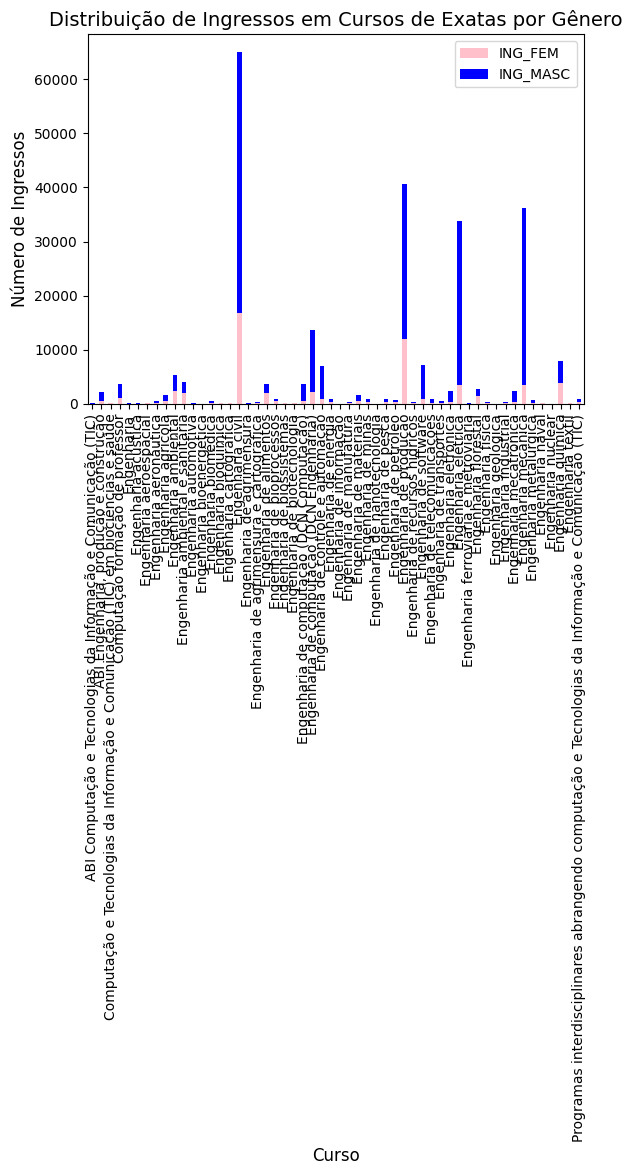

In [38]:
vagas_por_estado = data.groupby('SG_UF')['QT_VAGA_TOTAL'].sum()

plt.figure(figsize=(10, 6))
vagas_por_estado.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Vagas por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Vagas')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('C:\\archive\\distribuicao_vagas_estado.png')

plt.show()

In [ ]:
inscritos_por_modalidade = data[['QT_INSCRITO_TOTAL_DIURNO', 'QT_INSCRITO_TOTAL_NOTURNO', 'QT_INSCRITO_TOTAL_EAD']].sum()

plt.figure(figsize=(8, 8))
inscritos_por_modalidade.plot(kind='pie', 
                              autopct='%1.1f%%', 
                              startangle=90, 
                              colors=['lightcoral', 'lightgreen', 'lightblue'], 
                              labels=['Diurno', 'Noturno', 'EAD'])

plt.title('Proporção de Inscritos por Modalidade')
plt.ylabel('')  
plt.tight_layout()

plt.savefig('C:\\archive\\proporcao_inscritos_modalidade.png')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ingressantes_genero = data[['ING_FEM', 'ING_MASC']].sum()

ingressantes_genero.index = ['FEM', 'MASC']

plt.figure(figsize=(8, 8))
ingressantes_genero.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Comparação de Ingressantes por Gênero')
plt.ylabel('') 
plt.tight_layout()

plt.savefig('C:\\archive\\proporcao_femininos_masculinos_pizza.png')

plt.show()



In [ ]:
matriculas_faixa_etaria = data[['MAT_18_24', 'MAT_25_29', 'MAT_30_34', 'MAT_35_39', 'MAT_40_49', 'MAT_50_59', 'MAT_60_MAIS']].sum()

plt.figure(figsize=(10, 6))
matriculas_faixa_etaria.plot(kind='bar', color='orange')
plt.title('Número de Matrículas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Matrículas')

faixas_etarias = ['18-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60-MAIS']
plt.xticks(ticks=range(len(faixas_etarias)), labels=faixas_etarias, rotation=45)

plt.tight_layout()
plt.savefig('C:\\archive\\proporcao_matriculas_por_faixa_etaria.png')
plt.show()


In [ ]:
ingressantes_cor = data[['ING_BRANCA', 'ING_PRETA', 'ING_PARDA', 'ING_AMARELA', 'ING_INDIGENA']].sum()

ingressantes_cor.index = ['BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'INDIGENA']

plt.figure(figsize=(10, 6))
ingressantes_cor.plot(kind='bar', color=['lightgray', 'black', 'brown', 'yellow', 'green'])
plt.title('Ingressantes por Cor/Raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Total de Ingressantes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('C:\\archive\\proporcao_ingressantes_por_cor_raça.png')

plt.show()
